In [2]:
import pandas as pd
import re

## 'Covid Data'

In [3]:
data = pd.read_csv("C:\\Users\\ayushjain9\\Desktop\\TwitterProject\\data\\combine.csv")

In [4]:
data.shape

(870589, 10)

In [5]:
#Remove duplicates from Content column
data.drop_duplicates(subset ="Content", inplace = True)

In [6]:
data.shape

(377547, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377547 entries, 0 to 870566
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Datetime         377546 non-null  object
 1   Tweet Id         377545 non-null  object
 2   Content          377546 non-null  object
 3   Location         348776 non-null  object
 4   Retweeted Tweet  2 non-null       object
 5   Retweeted Count  377543 non-null  object
 6   Like Count       377543 non-null  object
 7   Hashtags         377394 non-null  object
 8   Follower Count   377542 non-null  object
 9   Verified User    377542 non-null  object
dtypes: object(10)
memory usage: 31.7+ MB


In [8]:
## Retweeted Tweet is 2
data.drop(['Tweet Id', 'Retweeted Tweet'], axis = 1, inplace=True)

In [9]:
print(data.columns.values.tolist())

['Datetime', 'Content', 'Location', 'Retweeted Count', 'Like Count', 'Hashtags', 'Follower Count', 'Verified User']


In [10]:
data.columns = [ 'date', 'text','user_location', 'retweets', 'likes_count','hashtags', 'user_followers', 'user_verified']

In [11]:
data = data[['user_location','user_followers', 'user_verified','date', 'text', 'hashtags','retweets','likes_count' ]]

In [12]:
data.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01 23:34:58+00:00,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01 22:08:50+00:00,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01 22:03:21+00:00,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01 20:00:10+00:00,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01 18:37:11+00:00,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


In [13]:
# Correcting Date format
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [14]:
data.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


## 'Vaccination Data'

In [15]:
data1 = pd.read_csv("C:\\Users\\ayushjain9\\Desktop\\TwitterProject\\data\\vaccination_all_tweets.csv")

In [16]:
data1.shape

(193272, 16)

In [17]:
data1.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193272 non-null  int64 
 1   user_name         193271 non-null  object
 2   user_location     134699 non-null  object
 3   user_description  179542 non-null  object
 4   user_created      193272 non-null  object
 5   user_followers    193272 non-null  int64 
 6   user_friends      193272 non-null  int64 
 7   user_favourites   193272 non-null  int64 
 8   user_verified     193272 non-null  bool  
 9   date              193272 non-null  object
 10  text              193272 non-null  object
 11  hashtags          152299 non-null  object
 12  source            193153 non-null  object
 13  retweets          193272 non-null  int64 
 14  favorites         193272 non-null  int64 
 15  is_retweet        193272 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [19]:
data1.drop(['id','user_name','user_description', 'user_created','user_friends','source','is_retweet','user_favourites'], axis = 1, inplace=True)

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_location   134699 non-null  object
 1   user_followers  193272 non-null  int64 
 2   user_verified   193272 non-null  bool  
 3   date            193272 non-null  object
 4   text            193272 non-null  object
 5   hashtags        152299 non-null  object
 6   retweets        193272 non-null  int64 
 7   favorites       193272 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 10.5+ MB


In [21]:
data1.columns = [ 'user_location','user_followers', 'user_verified','date', 'text', 'hashtags','retweets','likes_count']

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_location   134699 non-null  object
 1   user_followers  193272 non-null  int64 
 2   user_verified   193272 non-null  bool  
 3   date            193272 non-null  object
 4   text            193272 non-null  object
 5   hashtags        152299 non-null  object
 6   retweets        193272 non-null  int64 
 7   likes_count     193272 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 10.5+ MB


In [23]:
data1.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,"La Crescenta-Montrose, CA",405,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0
1,"San Francisco, CA",834,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1
2,Your Bed,10,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0
3,"Vancouver, BC - Canada",49165,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,NaN,152,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0


In [24]:
# Correcting Date format
data1['date'] = pd.to_datetime(data1['date'], errors='coerce').dt.date

In [25]:
data1.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,"La Crescenta-Montrose, CA",405,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0
1,"San Francisco, CA",834,False,2020-12-13,While the world has been on the wrong side of ...,NaN,1,1
2,Your Bed,10,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0
3,"Vancouver, BC - Canada",49165,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,NaN,152,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0


# Merging Two DataFrames

In [26]:
# Stack the DataFrames on top of each other
df = pd.concat([data, data1], axis=0, ignore_index = True)

In [27]:
df.shape

(570819, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570819 entries, 0 to 570818
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_location   483475 non-null  object
 1   user_followers  570814 non-null  object
 2   user_verified   570814 non-null  object
 3   date            570816 non-null  object
 4   text            570818 non-null  object
 5   hashtags        529693 non-null  object
 6   retweets        570815 non-null  object
 7   likes_count     570815 non-null  object
dtypes: object(8)
memory usage: 34.8+ MB


In [29]:
df.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


# Data Cleaning

## Date

In [30]:
df.date.isna

<bound method Series.isna of 0         2020-03-01
1         2020-03-01
2         2020-03-01
3         2020-03-01
4         2020-03-01
             ...    
570814    2021-09-13
570815    2021-09-13
570816    2021-09-13
570817    2021-09-13
570818    2021-09-13
Name: date, Length: 570819, dtype: object>

In [31]:
df.dropna(subset =['date'], inplace=True)

In [32]:
df.shape

(570816, 8)

In [33]:
# data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [34]:
# data1['date'] = pd.to_datetime(data1['date'], errors='coerce').dt.date

In [35]:
df.date.isnull().sum()

0

In [36]:
null_data = df[df.date.isnull()]
null_data

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count


In [37]:
df[pd.notnull(df['date'])]

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
...,...,...,...,...,...,...,...,...
570814,"Bengaluru, India",25,False,2021-09-13,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0,1
570815,"Bengaluru, India",25,False,2021-09-13,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0
570816,"Fremont, CA, USA",670,False,2021-09-13,US Special Envoy for Climate ... - https://t.c...,['IndiaPostUSA'],0,1
570817,"Fremont, CA, USA",670,False,2021-09-13,India's cumulative COVID-19 vaccination covera...,NaN,0,0


In [38]:
df.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,ประเทศไทย,33,FALSE,2020-03-01,Everyone takes care of their health please.✌🏽😷...,"['COVID', 'worldwide']",2,2
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0


## Location

In [39]:
# Location
df.user_location

0                            ประเทศไทย
1                               Mumbai
2                                Dhaka
3         Dubai, United Arab Emirates 
4                      SunnySideOfLife
                      ...             
570814                Bengaluru, India
570815                Bengaluru, India
570816                Fremont, CA, USA
570817                Fremont, CA, USA
570818                Bengaluru, India
Name: user_location, Length: 570816, dtype: object

In [40]:
# countries = list(df.user_location)
# countries

In [41]:
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ayushjain9\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [42]:
Word = list(set(words.words()))

In [43]:
df = df[df['user_location'].str.contains('|'.join(Word), na = False)]

In [44]:
# list(df.user_location)

In [45]:
df.shape

(476159, 8)

In [46]:
df.head()

,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
1,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
5,"Eheliyagoda, Sri Lanka",850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [47]:
from geotext import GeoText
# def find_country(n):
#     for c in pycountry.countries:
#         if str(c.name).lower() in n.lower():
#             return c.name

df1 = (df['user_location']
      .replace(r"\bUSA\b", "United States", regex=True)
      .apply(lambda x: GeoText(x).countries))

In [48]:
df1.head()

1             []
2             []
3             []
4             []
5    [Sri Lanka]
Name: user_location, dtype: object

In [49]:
df2 = (df['user_location']
      .replace(r"\bUSA\b", "United States", regex=True)
      .apply(lambda x: GeoText(x).cities))

In [50]:
df2.head()

1    [Mumbai]
2     [Dhaka]
3     [Dubai]
4          []
5          []
Name: user_location, dtype: object

In [51]:
df3 = pd.merge(df2,df1, left_index=True, right_index=True)
df3.head()

,user_location_x,user_location_y
1,[Mumbai],[]
2,[Dhaka],[]
3,[Dubai],[]
4,[],[]
5,[],[Sri Lanka]


In [52]:
df = pd.merge(df3, df, left_index=True, right_index=True)
df.head()

,user_location_x,user_location_y,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
1,[Mumbai],[],Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,[Dhaka],[],Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,[Dubai],[],"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,[],[],SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
5,[],[Sri Lanka],"Eheliyagoda, Sri Lanka",850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [53]:
df['user_location_x'] = [','.join(map(str, l)) for l in df['user_location_x']] #List to string
df['user_location_y'] = [','.join(map(str, l)) for l in df['user_location_y']]
df.head()

,user_location_x,user_location_y,user_location,user_followers,user_verified,date,text,hashtags,retweets,likes_count
1,Mumbai,,Mumbai,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
2,Dhaka,,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
3,Dubai,,"Dubai, United Arab Emirates",2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,,,SunnySideOfLife,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
5,,Sri Lanka,"Eheliyagoda, Sri Lanka",850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [54]:
web = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')

In [55]:
web.head()

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696


In [56]:
web['name'].str.lower()

0            les escaldes
1        andorra la vella
2          umm al qaywayn
3          ras al-khaimah
4            khawr fakkān
               ...       
23013            bulawayo
23014             bindura
23015          beitbridge
23016             epworth
23017         chitungwiza
Name: name, Length: 23018, dtype: object

In [57]:
df['user_location_y'].str.lower()

1                      
2                      
3                      
4                      
5             sri lanka
              ...      
570814            india
570815            india
570816    united states
570817    united states
570818            india
Name: user_location_y, Length: 476159, dtype: object

In [58]:
df_final = df.merge(web, how = 'left', left_on='user_location_x', right_on='name')[['user_location_x', 'user_location_y', 'user_location', 'name','country',
'subcountry','user_followers','user_verified','date','text','hashtags',
'retweets','likes_count']]

In [59]:
df_final.shape

(596927, 13)

In [60]:
df_final.head()

,user_location_x,user_location_y,user_location,name,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,Mumbai,,Mumbai,Mumbai,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
1,Dhaka,,Dhaka,Dhaka,Bangladesh,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,Dubai,,"Dubai, United Arab Emirates",Dubai,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
3,,,SunnySideOfLife,NaN,NaN,NaN,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
4,,Sri Lanka,"Eheliyagoda, Sri Lanka",NaN,NaN,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [61]:
# Filling NAN of country by User_location_y
df_final.country.fillna(df_final.user_location_y, inplace = True)
df_final.head()

,user_location_x,user_location_y,user_location,name,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,Mumbai,,Mumbai,Mumbai,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
1,Dhaka,,Dhaka,Dhaka,Bangladesh,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,Dubai,,"Dubai, United Arab Emirates",Dubai,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
3,,,SunnySideOfLife,NaN,,NaN,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
4,,Sri Lanka,"Eheliyagoda, Sri Lanka",NaN,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [62]:
df_final = df_final.drop(['user_location_x','user_location_y','user_location','name'], axis =1)

In [63]:
df_final.country.isnull().sum()

0

In [64]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
3,,NaN,754,FALSE,2020-03-01,@AbeShinzo request general public to avoid spo...,"['COVID19', 'coronavirus', 'COVID', 'Japan', '...",0,0
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0


In [65]:
import numpy as np
df_final['country'].replace('', np.nan, inplace=True)

In [66]:
df_final.dropna(subset=['country'], inplace=True)

In [67]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was a...,['covid'],0,0
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,Here are the latest developments on the #coron...,"['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled...,['COVID'],0,0
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Arm...","['Armenia', 'COVID']",0,0
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\...,"['Section144', 'SundayMotivation', 'COVID']",1,2


In [68]:
df_final.shape

(451259, 9)

In [69]:
# Removing Duplicates
df_final.text.duplicated().sum()

120920

In [70]:
df_final = df_final.drop_duplicates(subset=['text'], keep='last')

## Selecting df by countries

In [71]:
df_france  = df_final[df_final.country  == "France"]

In [72]:
df_france.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count
261,France,Île-de-France,5698,FALSE,2020-03-01,"I did good by not buying the tickets, #madonna...","['madonna', 'Corona']",0,2
281,France,Île-de-France,286,FALSE,2020-03-01,My daughter's Ballet School refused to accept ...,['Corona'],0,0
648,France,Île-de-France,830,FALSE,2020-03-02,The #COVID19 epidemic continues to expand rapi...,"['COVID19', 'NYTimes']",0,0
756,France,NaN,1852,FALSE,2020-03-02,#corona #coronavirusfr this is the reason of t...,"['corona', 'coronavirusfr']",1,0
841,France,Île-de-France,82672,TRUE,2020-03-02,Alibaba’s new #AI system can detect #coronavir...,"['AI', 'coronavirus', 'Covid_19']",1,6


# Text

A few preprocessing steps include:

* Dealing with stop words, numbers, social media hashtags, usernames, URLs, and HTML tags
* Deal with low-frequency terms
* Removing personal and sensitive data
* Expanding contractions (like “won’t” becoming “will not”)
* Deciding whether use stemming or lemmatization
* Applying POS tagging
* Dealing with diacritic signs and punctuation…

In [73]:
df_final.text.head()

0    I landed in Mumbai at midnight and there was a...
1    Here are the latest developments on the #coron...
2    @UltraAbuDhabi @MEFCC to go ahead as scheduled...
4    @warunawijesuriy Hey buddy, I think today #Arm...
5    This is what keeps India alive..\n#Section144\...
Name: text, dtype: object

In [74]:
pd.set_option('display.max_colwidth', 700)
df_final.text.head()

0                                                                                                                                                             I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid
1    Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi
2                                                                    @UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3
4                                                                                                                                                                @warunawijesuriy Hey buddy, I think today #Armenia  Records hi

In [75]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayushjain9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
# stop_words1 = stopwords.words("english")
# print(stop_words1)
stop_words = set(stopwords.words("english"))
stop_words.discard('not')
stop_words.discard('no')
print(stop_words)

{'your', "haven't", 'haven', 'been', 'where', 'do', 'some', 'myself', "aren't", 'most', 'on', 'these', 'about', 'those', 'over', "that'll", 'all', "isn't", 'her', "needn't", 'off', 'won', "don't", 'she', 'while', 'am', 'or', 'against', 'so', 'should', "doesn't", 'up', 'ourselves', 'this', 'same', 'weren', 'ma', "you're", 'hasn', 'themselves', 'his', 'which', "mightn't", 'is', 'being', 'their', 'did', 'above', "hasn't", "didn't", 'i', 'didn', 'theirs', 'out', 've', "she's", 'itself', 'as', 'below', 'both', 'more', 'couldn', "it's", 'just', 'they', 'once', 'aren', "weren't", 'who', 're', "shouldn't", 'himself', 'y', "shan't", 'we', 'doesn', 'hers', 'own', 's', 'by', 'other', 'each', 'too', 'having', 'any', 'such', 'yourself', 'are', "couldn't", 'were', 'whom', "you'd", 'll', 'our', 'had', 'its', 'between', 'now', 'isn', 'be', 'how', 'you', 'them', 'during', 'shan', 'but', 'that', 'only', 'ours', "you've", 'if', 't', 'was', 'shouldn', 'what', 'd', 'under', 'a', 'him', "hadn't", 'an', 'unt

In [77]:
import string

In [78]:
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words]) # Remove stop words
  x = x.encode('ascii', 'ignore').decode() # Remove unicode characters
  x = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
  x = re.sub(r'https*\S+', ' ', x) #  Remove URL
  # x = re.sub(r'@\S+', ' ', x)  # Remove mentions
  # x = re.sub(r'#\S+', ' ', x) # Remove Hashtags
  x = re.sub(r'\'\w+', '', x) # Remove ticks and the next character
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x) # remove punctuations
  x = re.sub(r'\w*\d+\w*', '', x) # remove numbers
  x = re.sub(r'\s{2,}', ' ', x) # replace over spaces
  return x

In [79]:
df_final['clean_texts'] = df_final.text.apply(text_preproc)
df_final.clean_texts.head()

0                                                                             landed mumbai midnight absolutely no thermal scan temperature check covid
1    latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid 
2                                    go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4                                                                                    hey buddy think today armenia records first patient suffered covid
5                                                                                                              keeps india alive sundaymotivation covid
Name: clean_texts, dtype: object

In [80]:
# df_final['clean_texts_no_Stopwords'] = df_final.text.apply(text_preproc)

In [81]:
# df_final.clean_texts_no_Stopwords.head()

In [82]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid


In [83]:
df_final.clean_texts = df_final.clean_texts.replace('\s+', ' ', regex=True) #removing extra spaces

In [84]:
df_final.shape

(330339, 10)

In [85]:
# from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer
# from nltk.stem.snowball import SnowballStemmer

In [86]:
# Tokenisation
# df_final['tokenized_texts'] = df_final.clean_texts.apply(word_tokenize)
# df_final.head()

In [87]:
# df_final.tokenized_texts.isna().sum()

In [88]:
# df_final['clean_texts']=df_final['clean_texts'].apply(str)
# def column(text):
#     updated_tweet = ' '.join([tweet for tweet in text])
#     return updated_tweet



In [89]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [90]:
df_final['clean_texts'].dtypes

dtype('O')

In [91]:
# import matplotlib.pyplot as plt
# def cloud_of_Words(tweet_cat,title):
#     unwanted = ['amp']#,'one','guy','really','mean','little bit','thing','say','go','actually','even','probably','going','said','something','okay','maybe','got','well','way']
#     forcloud = ' '.join([tweet for tweet in tweet_cat if tweet not in unwanted])
#     wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
#     plt.imshow(wordcloud, interpolation ='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()
#     plt.figure(figsize = (10,8))

In [92]:
# plt.figure(figsize = (10,8))
# # Creating wordclouds for positive, negative, neutral tweets
# cloud_of_Words(df_final['clean_texts'], 'Interpretation')

In [93]:
# words = " ".join(df_final['clean_texts'])
# wordss: list[str] = nltk.word_tokenize(words)
# fd = nltk.FreqDist(wordss)

In [96]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

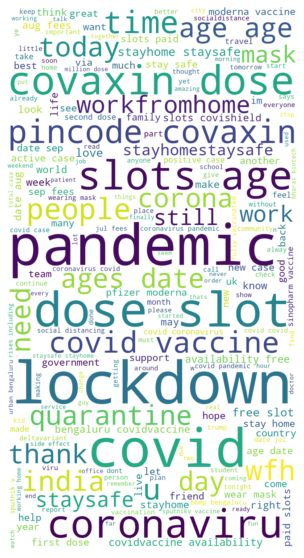

In [97]:
words = " ".join(df_final['clean_texts'])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)
unwanted = ['amp','one','really','mean','little bit','thing','say','go','actually','even','probably','going','said','something','okay','maybe','got','well','way']
text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Need to delete amp word from corpus.()
* stopwords = nltk.corpus.stopwords.words('english')
* newStopWords = ['stopWord1','stopWord2']
* stopwords.extend(newStopWords)

# NLTK

In [98]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayushjain9\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
df_final['scores'] = df_final['clean_texts'].apply(lambda review: sid.polarity_scores(review))

# df_final.head()

In [100]:
df_final['compound']  = df_final['scores'].apply(lambda score_dict: score_dict['compound'])

# df_final.head()

In [101]:
df_final['comp_score'] = df_final['compound'].apply(lambda c: 'pos' if c >0 else ('ntl' if c ==0 else 'neg'))

df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,scores,compound,comp_score
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3597}",-0.3597,neg
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos


In [102]:
df_final['clean_texts'].duplicated().sum()

29425

In [103]:
df_final = df_final.drop_duplicates(subset=['clean_texts'], keep='last')

In [104]:
df_final.head()

,country,subcountry,user_followers,user_verified,date,text,hashtags,retweets,likes_count,clean_texts,scores,compound,comp_score
0,India,Maharashtra,370,FALSE,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,['covid'],0,0,landed mumbai midnight absolutely no thermal scan temperature check covid,"{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3597}",-0.3597,neg
1,Bangladesh,Dhaka,57502,FALSE,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi","['coronavirusoutbreak', 'COVID', 'Coronavid19']",7,12,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,"{'neg': 0.119, 'neu': 0.78, 'pos': 0.101, 'compound': -0.1027}",-0.1027,neg
2,United Arab Emirates,Dubai,2061,TRUE,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,['COVID'],0,0,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,"{'neg': 0.096, 'neu': 0.622, 'pos': 0.282, 'compound': 0.5994}",0.5994,pos
4,Sri Lanka,NaN,850,FALSE,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID","['Armenia', 'COVID']",0,0,hey buddy think today armenia records first patient suffered covid,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.4939}",-0.4939,neg
5,India,NCT,908,FALSE,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,"['Section144', 'SundayMotivation', 'COVID']",1,2,keeps india alive sundaymotivation covid,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818,pos


In [105]:
# df_new = df_final.drop(['subcountry','clean_texts_no_Stopwords','scores','compound'], axis =1)
df_new = df_final.drop(['subcountry','scores','compound','retweets','hashtags','user_followers','user_verified','likes_count'], axis =1)
df_new.head()

,country,date,text,clean_texts,comp_score
0,India,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,landed mumbai midnight absolutely no thermal scan temperature check covid,neg
1,Bangladesh,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi",latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,neg
2,United Arab Emirates,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,pos
4,Sri Lanka,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID",hey buddy think today armenia records first patient suffered covid,neg
5,India,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,keeps india alive sundaymotivation covid,pos


In [106]:
df_new['comp_score'].value_counts()

pos    148188
ntl     84623
neg     68103
Name: comp_score, dtype: int64

In [107]:
# deleting ntl tweets
df_new = df_new[df_new['comp_score'] != 'ntl']
df_new.shape

(216291, 5)

In [108]:
# assigning a label to each tweet 0 negaitve, 1 positive
df_new['label'] = df_new['comp_score'].apply(lambda x: 1 if x == 'pos' else 0)
df_new.head()

,country,date,text,clean_texts,comp_score,label
0,India,2020-03-01,I landed in Mumbai at midnight and there was absolutely no thermal scan or temperature check. #covid,landed mumbai midnight absolutely no thermal scan temperature check covid,neg,0
1,Bangladesh,2020-03-01,"Here are the latest developments on the #coronavirusoutbreak:\n\n-A boom of cases in Italy, Iran and the U.K.\n-Italy to spend $4B on coronavirus fight\n-New York gets OK to develop its own coronavirus test\n\n#COVID #Coronavid19 https://t.co/t9I7scIuNi",latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,neg,0
2,United Arab Emirates,2020-03-01,@UltraAbuDhabi @MEFCC to go ahead as scheduled. @DJmag Middle East stands cancelled. Experts give their valuable advice on safety protocols at massive events! #COVID https://t.co/0XVKPI4Hb3,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,pos,1
4,Sri Lanka,2020-03-01,"@warunawijesuriy Hey buddy, I think today #Armenia Records his first patient who suffered #COVID",hey buddy think today armenia records first patient suffered covid,neg,0
5,India,2020-03-01,This is what keeps India alive..\n#Section144\n#SundayMotivation\n#COVID\nhttps://t.co/eD05WlkXQB,keeps india alive sundaymotivation covid,pos,1


In [109]:
# dropping text column, comp_score column
df_new = df_new.drop(['text','comp_score'], axis =1)
df_new.head()

,country,date,clean_texts,label
0,India,2020-03-01,landed mumbai midnight absolutely no thermal scan temperature check covid,0
1,Bangladesh,2020-03-01,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,0
2,United Arab Emirates,2020-03-01,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,1
4,Sri Lanka,2020-03-01,hey buddy think today armenia records first patient suffered covid,0
5,India,2020-03-01,keeps india alive sundaymotivation covid,1


In [110]:
# deleting index column
df_new = df_new.reset_index(drop=True)
df_new.head()

,country,date,clean_texts,label
0,India,2020-03-01,landed mumbai midnight absolutely no thermal scan temperature check covid,0
1,Bangladesh,2020-03-01,latest developments coronavirusoutbreak a boom cases italy iran u k italy spend coronavirus fight new york gets ok develop coronavirus test covid,0
2,United Arab Emirates,2020-03-01,go ahead scheduled middle east stands cancelled experts give valuable advice safety protocols massive events covid,1
3,Sri Lanka,2020-03-01,hey buddy think today armenia records first patient suffered covid,0
4,India,2020-03-01,keeps india alive sundaymotivation covid,1


### India- Dataframe 

In [111]:
df_India = df_new[df_new['country'] == 'India']
df_India.head()

,country,date,clean_texts,label
0,India,2020-03-01,landed mumbai midnight absolutely no thermal scan temperature check covid,0
4,India,2020-03-01,keeps india alive sundaymotivation covid,1
6,India,2020-03-01,not single patient suspected covid maharashtra health minister rajesh tope total people screened till patients currently observation india,1
8,India,2020-03-01,becoming increasingly serious globally covid,0
94,India,2020-03-01,people killed corona virus india people killed saffron virus delhi alone via,0


In [112]:
df_India['label'].value_counts()

1    36678
0    15820
Name: label, dtype: int64

In [113]:
df_India.shape

(52498, 4)

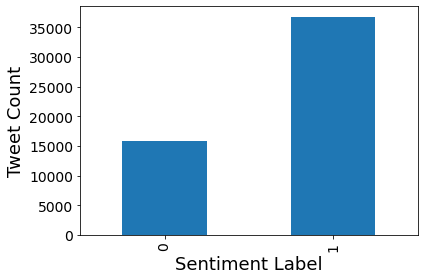

In [114]:
df_India['label'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
# df_new.plot(x="comp_score", y="", kind="bar", ax=ax, color="maroon")

## Negative is lower then positive sentiment

In [115]:
# raw_df1 = df_new[df_new['clean_texts'].str.contains('\b' + '\b|\b'.join('amp']) + '\b')]

# Model Building

In [116]:
# words = [w for w in nltk.corpus.vader_lexicon.words() if w.isalpha()]
# finder = nltk.collocations.TrigramCollocationFinder.from_words(words)

In [117]:
# df_India['text']

In [118]:
# pd.set_option("display.max_colwidth", -1)
df_India['clean_texts']

0                                                                          landed mumbai midnight absolutely no thermal scan temperature check covid
4                                                                                                           keeps india alive sundaymotivation covid
6         not single patient suspected covid maharashtra health minister rajesh tope total people screened till patients currently observation india
8                                                                                                       becoming increasingly serious globally covid
94                                                                      people killed corona virus india people killed saffron virus delhi alone via
                                                                             ...                                                                    
216279                                                     vaccination india painfully slow amp two approv

In [119]:
# pip install wordninja

In [120]:
# import wordninja
# for words in df_India['clean_texts']:
#     # print(words)
#     wordninja.split(words)

In [121]:
import wordninja
wordninja.split('Covid')

['C', 'ovid']

# Vectorizing Tokens

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(ngram_range=(2,2),min_df=5, max_df=0.9, stop_words='english')
vector.fit(df_India['clean_texts'])
vect_X = vector.fit_transform(df_India['clean_texts'])
vect_X.shape


(52498, 13104)

In [125]:
raw_df= pd.DataFrame(vect_X.toarray(),columns=vector.get_feature_names())

In [126]:
raw_df.head()

,aadhar card,aai imphal,aaj tak,aam aadmi,aaradhya lockdown,aarogya setu,aarogyasetu app,aarogyasetuapp bangalore,aarogyasetuapp bluetooth,aarogyasetuapp homeworkout,...,yrs age,yrs old,zero contact,zerohunger teamphc,zerohunger togetherwithteamphc,zomato swiggy,zoom calls,zoom meeting,zoom workfromhome,zydus cadila
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
raw_df.shape

(52498, 13104)

# Model Building

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_df, df_India['label'], test_size=0.2, random_state=0)   

In [133]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 41998
Size of y_train: 41998


Size of X_test: 10500
Size of y_test: 10500


Train proportion: 80%


In [134]:
X_train.head()

,aadhar card,aai imphal,aaj tak,aam aadmi,aaradhya lockdown,aarogya setu,aarogyasetu app,aarogyasetuapp bangalore,aarogyasetuapp bluetooth,aarogyasetuapp homeworkout,...,yrs age,yrs old,zero contact,zerohunger teamphc,zerohunger togetherwithteamphc,zomato swiggy,zoom calls,zoom meeting,zoom workfromhome,zydus cadila
29309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
y_train.head()

135997    0
172510    1
5581      0
99876     0
212229    0
Name: label, dtype: int64

In [ ]:
# import random
# id = random.randint(0,len(X_train))
# print("Train tweet: {}".format(X_train))
# print("Sentiment: {}".format(y_train))

In [ ]:
# df_India.to_csv('df_India.csv')

In [ ]:
# pip install torch

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [137]:
# logistic regression model
model_lr = LogisticRegression()
# fit the model
model_lr.fit(X_train, y_train)
# predict the test set
y_pred = model_lr.predict(X_test)
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))
# print the classification report
print(classification_report(y_test, y_pred))

c:\Users\ayushjain9\Desktop\TwitterProject\vlib\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 74.25%
[[ 746 2377]
 [ 327 7050]]
              precision    recall  f1-score   support

           0       0.70      0.24      0.36      3123
           1       0.75      0.96      0.84      7377

    accuracy                           0.74     10500
   macro avg       0.72      0.60      0.60     10500
weighted avg       0.73      0.74      0.70     10500

